<h1>Módulo 3: Aprendizado Supervisionado: Regressão</h1>

<h3>Objetivo: Prever o valor do limite de crédito a ser concedido para um cliente. </h3>

<h2>1. Introdução e Coleta dos Dados</h2>

<h3>O que é Regressão?</h3>
<ul>
<li>Processo de Machine Learning supervisionado.</li>
<li>Ao invés de prever um rótulo, iremos prever um valor contínuo (um número).</li>
<li>O sklearn é capaz de aplicar muitos dos mesmos modelos de classificação em problemas de regressão, mas as métrias de avaliação são diferentes.</li>
</ul>

<h3>Coleta dos Dados:</h3>
<ul>
<li>Dados fornecidos: ID_CLIENTE, SEGMENTACAO, RENDA, INADIMPLENTE, ANTIGUIDADE, PEDRA.</li>
</ul>    

In [1]:
# Ocultar todos os warnings (Opcional)
import warnings
warnings.filterwarnings('ignore')

<font color="blue"> <h1>Prompt</h1> </font>

Nós vamos trabalhar com aprendizado Supervisionado, utilizando a Regressão Linear. A finalidade é prever o valor do limite de crédito a ser concedido para um cliente. Vou fornecer um passo a passo para ser executado a seguir. Importante: Execute apenas as etapas que forem passadas e não importe ace_tools. 

<font color="blue"> <h1>Prompt</h1> </font>

Primeiro, importe as bibliotecas necessárias para manipulação de dados, clusterização e visualização: pandas, numpy, matplotlib e sklearn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Confirming the imports
print("Libraries imported successfully!")

Libraries imported successfully!


<font color="blue"> <h1>Prompt</h1> </font>

Carregue a base de dados presente no link 'https://github.com/ksddavila/treinamentoMLChatGPT/raw/main/M3_base_limites.xlsx'. Chame esse dataframe de 'df'

In [4]:
# Load the dataset from the provided link
url = 'https://github.com/ksddavila/treinamentoMLChatGPT/raw/main/M3_base_limites.xlsx'
url = 'M3_base_limites.xlsx'

df = pd.read_excel(url)

# Display the first few rows of the dataframe to confirm it's loaded correctly
df.head()

,ID_CLIENTE,SEGMENTO_CLIENTE,RENDA,ANTIGUIDADE,INADIMPLENTE,PEDRA,LIMITE_CREDITO
0,1,CAMPEÃO,24534,19,nao,DIAMANTE,7200
1,2,FIEL,8411,25,nao,OURO,4500
2,3,NOVO,12486,1,nao,PRATA,1800
3,4,NOVO,17877,1,nao,PRATA,3300
4,5,SUMIDO,12016,19,sim,PRATA,2715


<h2>2. Análise de Dados e Pré-processamento</h2>

<font color="blue"> <h1>Prompt</h1> </font>

Verifique se existem valores ausentes no dataframe. 

In [5]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
missing_values

ID_CLIENTE          0
SEGMENTO_CLIENTE    0
RENDA               0
ANTIGUIDADE         0
INADIMPLENTE        0
PEDRA               0
LIMITE_CREDITO      0
dtype: int64

<font color="blue"> <h1>Prompt</h1> </font>

Primeiro, vamos calcular as estatísticas descritivas das variáveis numéricas.

In [6]:
# Calculate descriptive statistics for the numerical variables
descriptive_stats = df.describe()
descriptive_stats

,ID_CLIENTE,RENDA,ANTIGUIDADE,LIMITE_CREDITO
count,50000.000000,50000.00000,50000.000000,50000.000000
mean,25000.500000,13509.87484,11.635200,3536.332700
std,14433.901067,6659.59864,9.799312,1785.985651
min,1.000000,2000.00000,1.000000,450.000000
25%,12500.750000,7759.00000,1.000000,2100.000000
50%,25000.500000,13553.50000,10.000000,3375.000000
75%,37500.250000,19300.00000,20.000000,4665.000000
max,50000.000000,25000.00000,30.000000,8300.000000


<font color="blue"> <h1>Prompt</h1> </font>

Aplique o pairplot para gerar uma grade de gráficos de dispersão para cada par de variáveis e histogramas para cada variável individual, afim de entender melhor as correlações e distribuições dos dados.

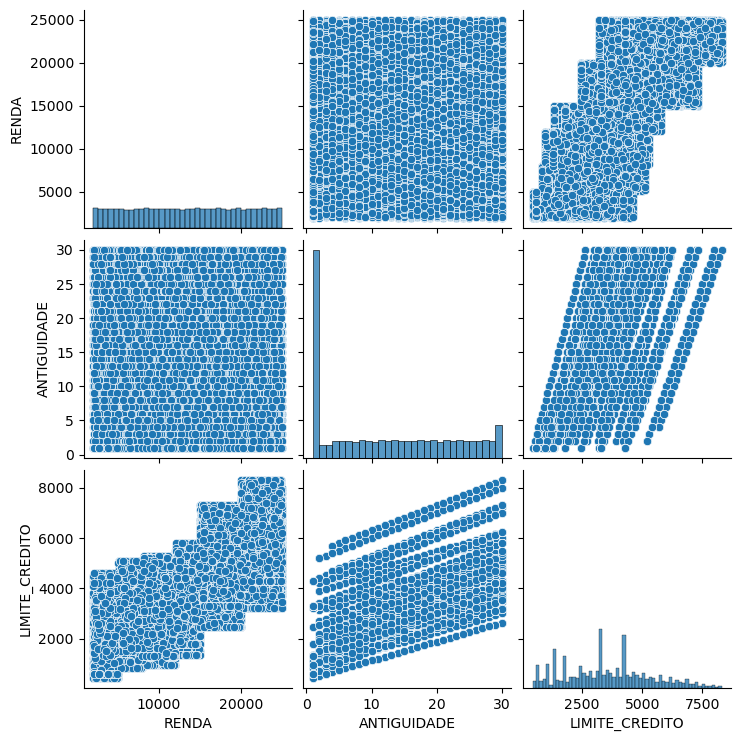

In [7]:
import seaborn as sns

# Generate a pairplot for the numerical variables in the dataframe
sns.pairplot(df[['RENDA', 'ANTIGUIDADE', 'LIMITE_CREDITO']])
plt.show()

<font color="blue"> <h1>Prompt</h1> </font>

Vamos realizar a codificação das variáveis categóricas usando One-Hot Encoding

In [8]:
# Realizar a codificação One-Hot Encoding das variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['SEGMENTO_CLIENTE', 'INADIMPLENTE', 'PEDRA'], drop_first=True)

# Mostrar as primeiras linhas do dataframe codificado para confirmar a codificação
df_encoded.head()

,ID_CLIENTE,RENDA,ANTIGUIDADE,LIMITE_CREDITO,SEGMENTO_CLIENTE_FIEL,SEGMENTO_CLIENTE_NOVO,SEGMENTO_CLIENTE_SUMIDO,INADIMPLENTE_sim,PEDRA_OURO,PEDRA_PRATA
0,1,24534,19,7200,0,0,0,0,0,0
1,2,8411,25,4500,1,0,0,0,1,0
2,3,12486,1,1800,0,1,0,0,0,1
3,4,17877,1,3300,0,1,0,0,0,1
4,5,12016,19,2715,0,0,1,1,0,1


<h2>3. Treinamento do Modelo</h2>

<font color="blue"> <h1>Prompt</h1> </font>

Agora divida os dados em treino e teste (80-20%). Exclua a coluna 'ID_CLIENTE'.

In [9]:
from sklearn.model_selection import train_test_split

# Excluir a coluna 'ID_CLIENTE'
df_encoded = df_encoded.drop(columns=['ID_CLIENTE'])

# Dividir os dados em treino e teste (80-20%)
X = df_encoded.drop(columns=['LIMITE_CREDITO'])
y = df_encoded['LIMITE_CREDITO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos de treino e teste para confirmar a divisão
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((40000, 8), (10000, 8), (40000,), (10000,))

<font color="blue"> <h1>Prompt</h1> </font>

Construa o modelo de regressão linear e aplique o coef_ (coeficientes), exibindo-o em um dataframe. Explique os resultados.  

In [10]:
# Construir o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Obter os coeficientes do modelo
coefficients = model.coef_

# Criar um dataframe para exibir os coeficientes
coefficients_df = pd.DataFrame(coefficients, X_train.columns, columns=['Coeficiente'])
coefficients_df

,Coeficiente
RENDA,0.184989
ANTIGUIDADE,93.337667
SEGMENTO_CLIENTE_FIEL,-150.860771
SEGMENTO_CLIENTE_NOVO,-372.910035
SEGMENTO_CLIENTE_SUMIDO,-331.587252
INADIMPLENTE_sim,-942.628569
PEDRA_OURO,-150.860771
PEDRA_PRATA,-704.497287


<h2>Coeficientes:</h2>
<ul>
<li>O atributo (coef_) armazena os coeficientes (pesos) atribuídos a cada uma das variáveis independentes. </li>               <li>Esses coeficientes indicam a magnitude e a direção da relação entre cada variável independente e a variável dependente (neste caso, o limite de crédito).</li>  
<li>Coeficientes positivos aumentam o limite de crédito, enquanto coeficientes negativos o reduzem.</li>    
</ul>    

<h2>Propósito dos Coeficientes:</h2>
<ul>
<li><b>Quantificam a Relação:</b> Cada coeficiente quantifica a relação entre uma variável independente e a variável dependente.</li>
<ul>
<li>Um coeficiente positivo indica que, à medida que a variável independente aumenta, a variável dependente também tende a aumentar. Um coeficiente negativo indica que, à medida que a variável independente aumenta, a variável dependente tende a diminuir.</li>
</ul>   
<li><b>Importância das Variáveis:</b> A magnitude do coeficiente indica a força da relação. Variáveis com coeficientes maiores (em valor absoluto) têm um impacto maior na previsão da variável dependente.</li>
<li><b>Interpretação do Modelo:</b> Eles ajudam a entender como cada variável está contribuindo para a previsão, facilitando a interpretação do modelo.</li>
</ul>

<h2>Exemplo:</h2>
<ul>
<li><b>SEGMENTACAO: 1500.0</b> ----> Um aumento de uma unidade na segmentação (ex.: de 'Novo' para 'Fiel') resulta em um aumento de R$ 1500 no limite de crédito, mantidas todas as outras variáveis constantes.</li>

<li><b>RENDA: 3000.0</b> ----> Um aumento de uma unidade padrão na renda resulta em um aumento de R$ 3000 no limite de crédito.</li>
    
<li><b>INADIMPLENTE: -2000.0</b> ----> Se um cliente é inadimplente, o limite de crédito diminui em R$ 2000.</li>

<li><b>ANTIGUIDADE: 500.0</b> ----> Cada ano adicional de antiguidade aumenta o limite de crédito em R$ 500.</li>
    
<li><b>PEDRA: 1000.0</b> ----> Um aumento de uma unidade na categoria da pedra (ex.: de 'Prata' para 'Ouro') resulta em um aumento de R$ 1000 no limite de crédito.</li>     
</ul>

<h2>4. Avaliação</h2>

### Explicação das Métricas de Avaliação

<h4>Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) e R² (coeficiente de determinação).</h4>
<ul>
<li><b>root_mean_squared_error</b>: Calcula a raiz quadrada do erro quadrático médio, oferecendo uma interpretação mais direta dos erros no mesmo espaço das variáveis dependentes.</li>    
<li><b>mean_absolute_error</b>: Calcula o erro absoluto médio entre as previsões e os valores reais.</li>
<li><b>r2_score</b>: Calcula o coeficiente de determinação, que mede a proporção da variação na variável dependente que é previsível a partir das variáveis independentes.</li>
</ul>

<h4>Propósito das Métricas</h4>

<h5>RMSE (Root Mean Squared Error):</h5>
<ul>
<li>Fornece uma medida da magnitude dos erros de previsão no mesmo espaço das variáveis dependentes.</li>
<li>Penaliza erros grandes de forma mais significativa do que o MAE.</li>
<li>Menor valor indica melhor desempenho do modelo.</li>
</ul>

<h5>MAE (Mean Absolute Error):</h5>
<ul>
<li>Indica, em média, o quanto as previsões estão distantes dos valores reais.</li>
<li>É intuitivo e fácil de interpretar.</li>
<li>Não penaliza tanto grandes erros como o MSE.</li>
</ul>

<h5>R² (Coeficiente de Determinação):</h5>
<ul>
<li>Mede a proporção da variância na variável dependente que é explicada pelas variáveis independentes.</li>
<li>Um valor de R² próximo de 1 indica que o modelo explica bem a variabilidade dos dados.</li>
<li>Um valor de R² próximo de 0 indica que o modelo não explica bem a variabilidade dos dados.</li>
</ul>

<font color="blue"> <h1>Prompt</h1> </font>

Realize avaliações com o Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) e R² (coeficiente de determinação). Explique os resultados obtidos. 

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular RMSE, MAE e R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

(rmse, mae, r2)

(402.9788624388338, 329.07446966097154, 0.9491511630549437)

<h2>5. Aplicando</h2>

<font color="blue"> <h1>Prompt</h1> </font>

Utilizando o modelo treinado e executando localmente, gere aleatoriamente 3 dados de clientes novos, aplique ao modelo que trabalhamos e exiba limite de crédito previsto. Ajuste a saída para ficar do tipo:
* ID_CLIENTE	
* SEGMENTO_CLIENTE	
* RENDA	
* INADIMPLENTE	
* ANTIGUIDADE	
* PEDRA	
* LIMITE_CREDITO

Aplique 42 à aleatoriedade. Garanta que o OneHotEncoder e todas as etapas de tratamento sejam aplicadas. 

In [15]:
# Configurar a semente para reprodutibilidade
np.random.seed(42)

# Gerar dados aleatórios para 3 novos clientes
new_clients = pd.DataFrame({
    'ID_CLIENTE': [50001, 50002, 50003],
    'SEGMENTO_CLIENTE': np.random.choice(['FIEL', 'NOVO', 'SUMIDO'], 3),
    'RENDA': np.random.randint(2000, 25001, 3),
    'INADIMPLENTE': np.random.choice(['sim', 'não'], 3),
    'ANTIGUIDADE': np.random.randint(1, 31, 3),
    'PEDRA': np.random.choice(['OURO', 'PRATA', 'BRONZE'], 3)
})

# Aplicar One-Hot Encoding nos novos dados
new_clients_encoded = pd.get_dummies(new_clients, columns=['SEGMENTO_CLIENTE', 'INADIMPLENTE', 'PEDRA'], drop_first=True)

# Alinhar com as colunas do dataframe original codificado
new_clients_encoded = new_clients_encoded.reindex(columns=X_train.columns, fill_value=0)

# Prever o limite de crédito para os novos clientes
new_clients['LIMITE_CREDITO'] = model.predict(new_clients_encoded)

# Reorganizar as colunas para a saída solicitada
new_clients = new_clients[['ID_CLIENTE', 'SEGMENTO_CLIENTE', 'RENDA', 'INADIMPLENTE', 'ANTIGUIDADE', 'PEDRA', 'LIMITE_CREDITO']]
new_clients

,ID_CLIENTE,SEGMENTO_CLIENTE,RENDA,INADIMPLENTE,ANTIGUIDADE,PEDRA,LIMITE_CREDITO
0,50001,SUMIDO,23575,sim,23,OURO,5977.178794
1,50002,FIEL,13964,não,11,BRONZE,4504.273401
2,50003,SUMIDO,13284,sim,11,PRATA,2399.767723
